In [268]:
!pip3 install sklearn

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [270]:
# Import the data to use it for machine learning

#read csv file
data = "Enrollment_publicVSPrivate_1965-2026.csv"
df = pd.read_csv(data, encoding = "ISO-8859-1")
df.head()


,Year,Public,Private
0,2026,16.64,5.99
1,2025,16.54,5.96
2,2024,16.41,5.93
3,2023,16.25,5.87
4,2022,16.08,5.81


In [271]:
# Historical data was until 2015. For machine learning, use up to 2015 data. Drop the projected data
df1=df.drop(df.index[:11])

In [272]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
X = df1.Year.values.reshape(-1, 1)
y = df1.Public.values.reshape(-1, 1)

In [274]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [275]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 0.19261629]]
y-axis intercept:  [-372.83288688]


In [276]:
predictions = model.predict(X)
print(f"True output: {y[0]}, Predicted output: {predictions[0]}, Prediction Error: {predictions[0]-y[0]}")

True output: [ 14.57], Predicted output: [ 15.28893665], Prediction Error: [ 0.71893665]


In [277]:
x_min = X.min()
x_max = X.max()

In [278]:
# Use the coefficient derived to plot y min and max

In [279]:
y_min = -372.83288688 + 0.19261629 * x_min
y_max = -372.83288688 + 0.19261629 * x_max



In [280]:
y_min_actual = y.min()
y_max_actual = y.max()
print(y_min_actual, y_min, y_max_actual, y_max)

3.97 5.65812297 15.14 15.28893747


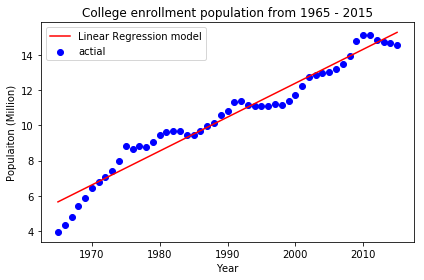

In [281]:
plt.scatter(X, y, c='blue', label='actial')
plt.plot([x_min, x_max], [y_min, y_max], c='red', label='Linear Regression model')
plt.title('College enrollment population from 1965 - 2015')
plt.xlabel('Year')
plt.ylabel('Populaiton (Million)')

plt.legend()
plt.tight_layout()
plt.show()

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(mse, r2)

0.408892701446 0.951595725635


In [283]:
# r2 value: Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
#     A constant model that always predicts the expected value of y, disregarding the input features, 
#     would get a R^2 score of 0.0.


In [284]:
model.score(X, y)

0.95159572563450734

In [285]:
# Plot private school enrollment

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [286]:
X = df1.Year.values.reshape(-1, 1)
y2 = df1.Private.values.reshape(-1, 1)

In [287]:
model2.fit(X, y2)
print(model2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [288]:
print('Weight coefficients: ', model2.coef_)
print('y-axis intercept: ', model2.intercept_) 

Weight coefficients:  [[ 0.07490317]]
y-axis intercept:  [-145.70279336]


In [289]:
predictions = model2.predict(X)
print(f"True output: {y[0]}, Predicted output: {predictions[0]}, Prediction Error: {predictions[0]-y[0]}")

True output: [ 14.57], Predicted output: [ 5.22708899], Prediction Error: [-9.34291101]


In [290]:
y2_min = -145.70279336 + 0.07490317 * x_min
y2_max = -145.70279336 + 0.07490317 * x_max

In [291]:
y2_min_actual = y2.min()
y2_max_actual = y2.max()
print(y2_min_actual, y2_min, y2_max_actual, y2_max)

1.95 1.48193569 5.89 5.22709419


In [292]:
from sklearn.metrics import mean_squared_error, r2_score
predicted2 = model2.predict(X)
mse_private = mean_squared_error(y2, predicted2)
r2_private = r2_score(y2, predicted2)

print(mse, r2)

0.408892701446 0.951595725635


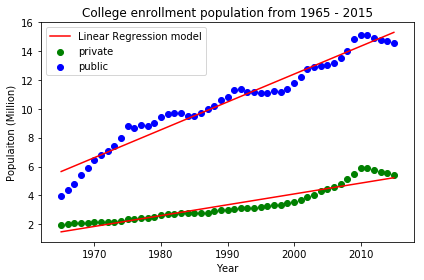

In [293]:
plt.scatter(X, y2, c='green', label='private')
plt.scatter(X, y, c='blue', label='public')
plt.plot([x_min, x_max], [y2_min, y2_max], c='red', label='Linear Regression model')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.title('College enrollment population from 1965 - 2015')
plt.xlabel('Year')
plt.ylabel('Populaiton (Million)')

plt.legend()
plt.tight_layout()
plt.show()

In [294]:
# Use our regression model to calculate the pridictive values until 2026

columns = ['Year','Public_model', 'Private_model']
df2 = pd.DataFrame(columns=columns)

for x in range(0,11):
    year = 2016 + x
    public =  -372.83288688 + 0.19261629 * year
    private = -145.70279336 + 0.07490317 *year
    df2.loc[-1] = [year, public, private]
    df2.index = df2.index + 1 
    df2 = df2.sort_index() 

In [295]:
df2.head()


,Year,Public_model,Private_model
0,2026.0,17.407717,6.051029
1,2025.0,17.215100,5.976126
2,2024.0,17.022484,5.901223
3,2023.0,16.829868,5.826320
4,2022.0,16.637251,5.751416


In [296]:
reversed_df2 = df2.iloc[::-1]
reversed_df2

,Year,Public_model,Private_model
10,2016.0,15.481554,5.301997
9,2017.0,15.674170,5.376901
8,2018.0,15.866786,5.451804
7,2019.0,16.059403,5.526707
6,2020.0,16.252019,5.601610
5,2021.0,16.444635,5.676513
4,2022.0,16.637251,5.751416
3,2023.0,16.829868,5.826320
2,2024.0,17.022484,5.901223
1,2025.0,17.215100,5.976126


In [297]:
reversed_df2.reset_index(drop=True)

,Year,Public_model,Private_model
0,2016.0,15.481554,5.301997
1,2017.0,15.674170,5.376901
2,2018.0,15.866786,5.451804
3,2019.0,16.059403,5.526707
4,2020.0,16.252019,5.601610
5,2021.0,16.444635,5.676513
6,2022.0,16.637251,5.751416
7,2023.0,16.829868,5.826320
8,2024.0,17.022484,5.901223
9,2025.0,17.215100,5.976126


In [298]:
df3 = df.drop(df.index[11:])

reversed_df3 = df3.iloc[::-1]
reversed_df3.reset_index(drop=True)

,Year,Public,Private
0,2016,14.84,5.34
1,2017,15.00,5.41
2,2018,15.21,5.48
3,2019,15.44,5.57
4,2020,15.68,5.66
5,2021,15.91,5.75
6,2022,16.08,5.81
7,2023,16.25,5.87
8,2024,16.41,5.93
9,2025,16.54,5.96


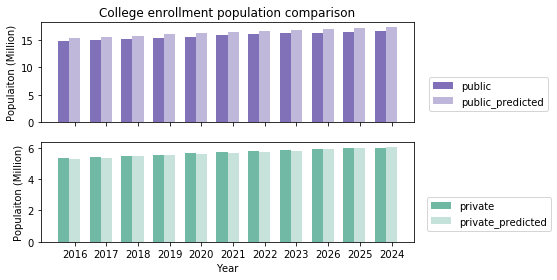

In [299]:
# Compare the original prediction vs our prediction
 
# data to plot
n_groups = 11
public = reversed_df3["Public"]
private = reversed_df3["Private"]
predicted1 = reversed_df2["Public_model"]
predicted2 = reversed_df2["Private_model"]

 
    
# f, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(x, y)
# axarr[0].set_title('Sharing X axis')
# axarr[1].scatter(x, y)

# create plot
fig, (ax1, ax2) = plt.subplots(2, sharex = True)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = ax1.bar(index, public, bar_width,
                 alpha=opacity,
                 color='#624ea7',
                 label='public')
rects2 = ax2.bar(index, private, bar_width,
                 alpha=opacity,
                 color='#4ea78f',
                 label='private')
 
rects3 = ax1.bar(index + bar_width, predicted1, bar_width,
                 alpha=opacity,
                 color='#b0a6d3',
                 label='public_predicted')
rects4 = ax2.bar(index + bar_width, predicted2, bar_width,
                 alpha=opacity,
                 color='#b8dbd2',
                 label='private_predicted')


ax1.set_title('College enrollment population comparison')
ax1.set_ylabel('Populaiton (Million)')
ax2.set_ylabel('Populaiton (Million)')
ax2.set_xlabel('Year')
plt.xticks(index + bar_width, ('2016', '2017', '2018',  '2019','2020','2021', "2022",  '2023', "2026", '2025', '2024',))
ax1.legend(loc=9, bbox_to_anchor=(1.2, 0.5))
ax2.legend(loc=9, bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()